In [227]:
import pandas as pd

In [228]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [229]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [231]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [232]:
train_data.shape, test_data.shape, gender_submission.shape

((891, 12), (418, 11), (418, 2))

In [233]:
test_data_combined = pd.merge(test_data,gender_submission,on='PassengerId')

In [234]:
test_data_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [235]:
# save the combined test data
test_data_combined.to_csv('test_combined.csv',index=False)

In [236]:
# arrange the columns in the same order as the train data
train_data = train_data[test_data_combined.columns]

In [237]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [238]:
test_data_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [239]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
test_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [241]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [242]:
test_data_combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [243]:
train_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [244]:
test_data_combined.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [245]:
train_data.drop(['Cabin'],axis=1,inplace=True)
test_data_combined.drop(['Cabin'],axis=1,inplace=True)

In [246]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data_combined['Age'].fillna(test_data_combined['Age'].mean(),inplace=True)

C:\Users\K7alid\AppData\Local\Temp\ipykernel_23424\2729213809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
C:\Users\K7alid\AppData\Local\Temp\ipykernel_23424\2729213809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [247]:
train_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [248]:
test_data_combined.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
dtype: int64

In [249]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [250]:
train_data['Embarked'].fillna(train_data['Embarked'].mod,inplace=True)

In [251]:
train_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [252]:
test_data_combined.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
dtype: int64

In [253]:
test_data_combined['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [254]:
test_data_combined['Fare'].fillna(test_data_combined['Fare'].mean(),inplace=True)

C:\Users\K7alid\AppData\Local\Temp\ipykernel_23424\2493267613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_combined['Fare'].fillna(test_data_combined['Fare'].mean(),inplace=True)


In [255]:
test_data_combined.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [256]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [257]:
test_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [258]:
train_data['Age'] = train_data['Age'].astype(int)
test_data_combined['Age'] = test_data_combined['Age'].astype(int)

In [259]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Survived     891 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [260]:
test_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 34.4+ KB


In [261]:
train_data['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [262]:
test_data_combined['Ticket'].value_counts()

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [263]:
ticket = pd.merge(train_data['Ticket'],test_data_combined['Ticket'])

In [264]:
ticket.value_counts()

Ticket      
CA. 2343        28
347077          12
CA 2144         12
S.O.C. 14879    10
PC 17608        10
                ..
2926             1
29105            1
28664            1
2689             1
W.E.P. 5734      1
Name: count, Length: 115, dtype: int64

In [265]:
ticket.shape

(297, 1)

In [266]:
train_data.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [267]:
test_data_combined.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [268]:
train_data.shape, test_data_combined.shape

((891, 8), (418, 8))

In [269]:
import matplotlib.pyplot as plt
def show_boxplot(data, column):
    data.boxplot(column=column)
    plt.title('Boxplot of ' + column)
    plt.ylabel(column)
    plt.show()

In [270]:
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.3 * iqr
    upper_bound = q3 + 1.3 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data

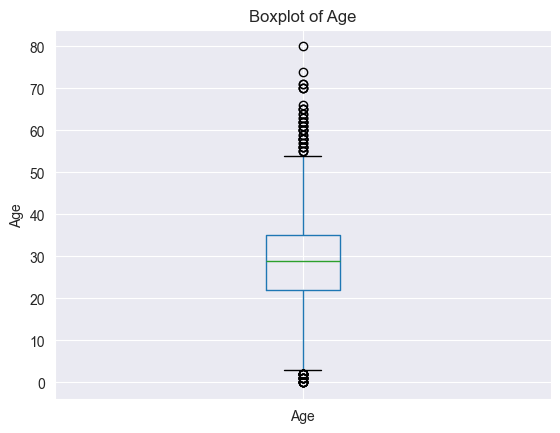

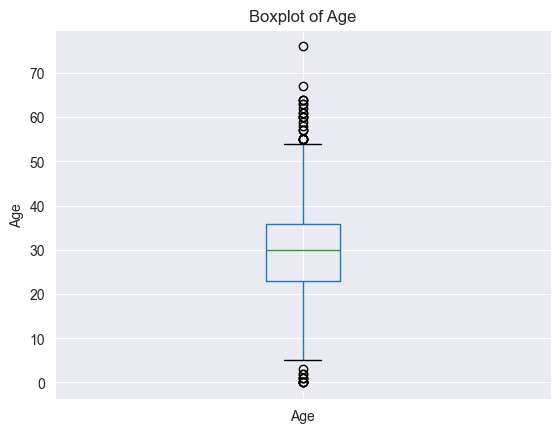

In [271]:
show_boxplot(train_data, 'Age')
show_boxplot(test_data_combined, 'Age')

In [272]:
train_data = remove_outliers(train_data, 'Age')
test_data_combined = remove_outliers(test_data_combined, 'Age')

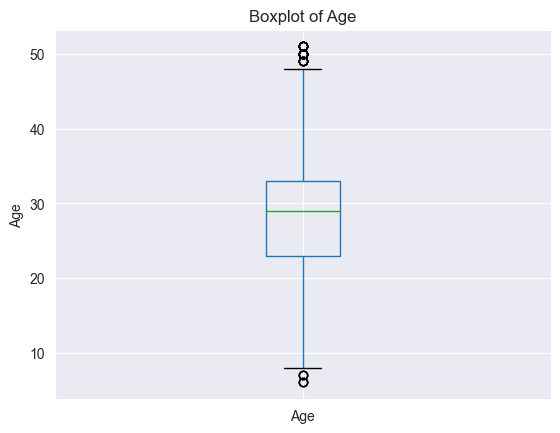

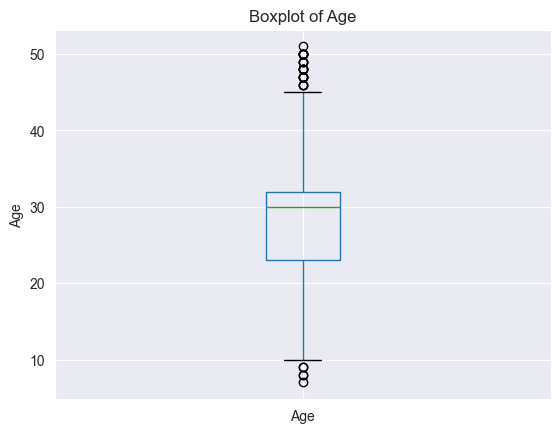

In [273]:
show_boxplot(train_data, 'Age')
show_boxplot(test_data_combined, 'Age')

In [274]:
test_data_combined = test_data_combined[(test_data_combined['Age'] > 13) & (test_data_combined['Age'] < 40)]
train_data = train_data[(train_data['Age'] > 13) & (train_data['Age'] < 40)]

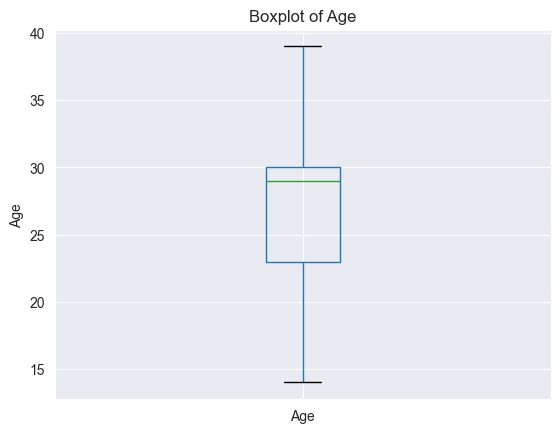

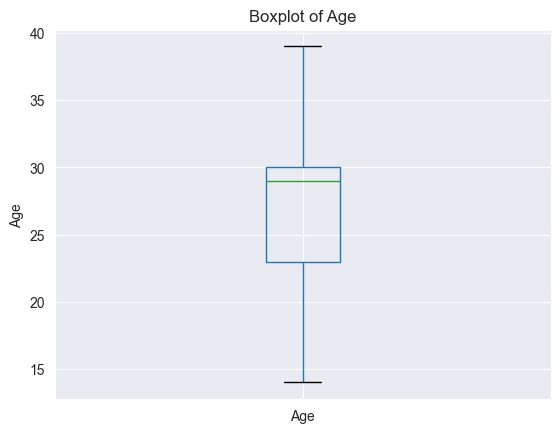

In [275]:
show_boxplot(train_data, 'Age')
show_boxplot(test_data_combined, 'Age')

In [276]:
train_data.shape, test_data_combined.shape

((657, 8), (308, 8))

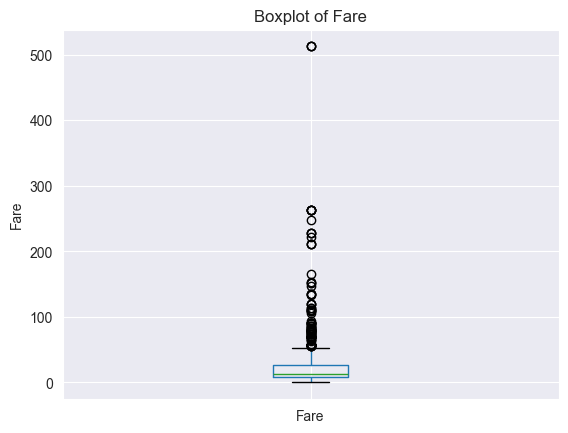

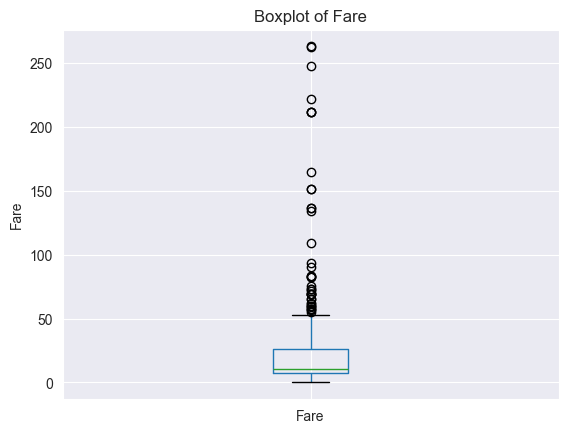

In [277]:
show_boxplot(train_data, 'Fare')
show_boxplot(test_data_combined, 'Fare')

In [278]:
train_data = remove_outliers(train_data, 'Fare')
test_data_combined = remove_outliers(test_data_combined, 'Fare')

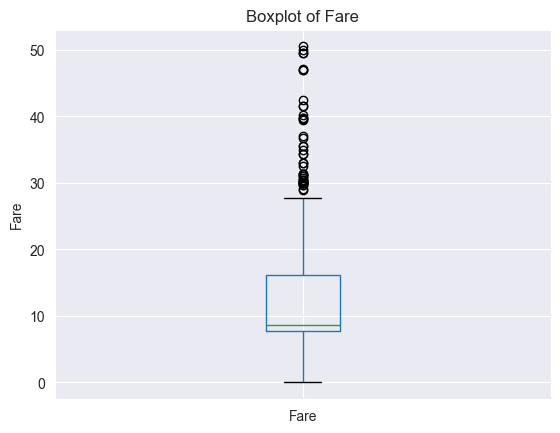

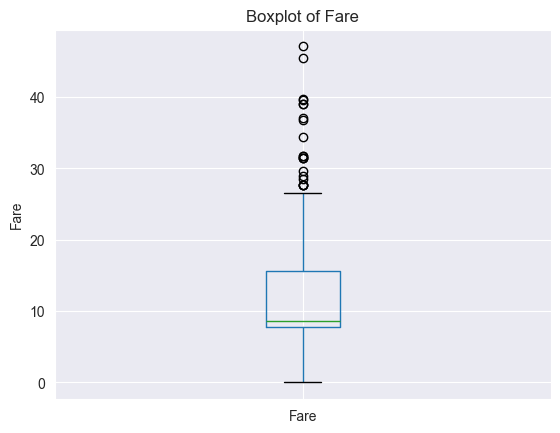

In [279]:
show_boxplot(train_data, 'Fare')
show_boxplot(test_data_combined, 'Fare')

In [280]:
# test_data_combined = test_data_combined[test_data_combined['Fare'] < 22]
# train_data = train_data[train_data['Fare'] < 22]

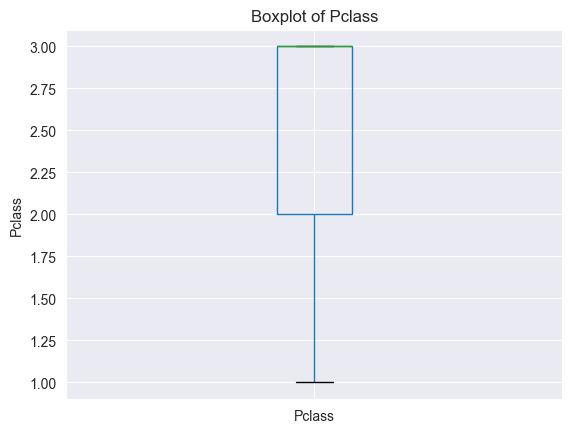

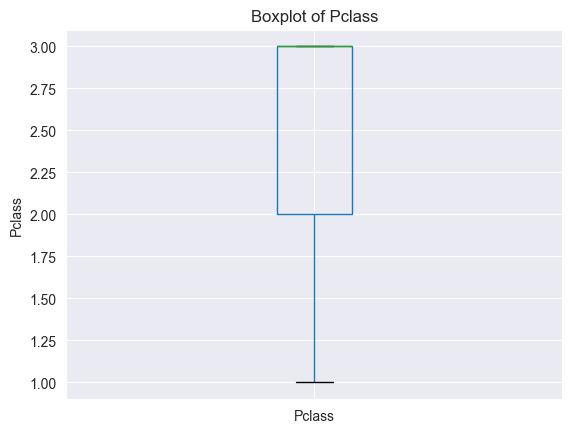

In [285]:
show_boxplot(train_data, 'Pclass')
show_boxplot(test_data_combined, 'Pclass')

In [287]:
train_data.shape, test_data_combined.shape

((549, 8), (266, 8))

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    549 non-null    int64  
 1   Sex       549 non-null    object 
 2   Age       549 non-null    int32  
 3   SibSp     549 non-null    int64  
 4   Parch     549 non-null    int64  
 5   Fare      549 non-null    float64
 6   Embarked  549 non-null    object 
 7   Survived  549 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 36.5+ KB


In [294]:
train_data.Fare.value_counts()

Fare
7.8958     37
8.0500     36
13.0000    35
7.7500     29
26.0000    20
           ..
12.0000     1
7.7292      1
4.0125      1
35.0000     1
29.1250     1
Name: count, Length: 158, dtype: int64

In [301]:
X_train = train_data.drop(['Survived'],axis=1).values
y_train = train_data['Survived'].values
X_test = test_data_combined.drop(['Survived'],axis=1).values
y_test = test_data_combined['Survived'].values

In [302]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((549, 7), (549,), (266, 7), (266,))

In [303]:
X_train

array([[3, 'male', 22, ..., 0, 7.25, 'S'],
       [3, 'female', 26, ..., 0, 7.925, 'S'],
       [3, 'male', 35, ..., 0, 8.05, 'S'],
       ...,
       [3, 'female', 29, ..., 2, 23.45, 'S'],
       [1, 'male', 26, ..., 0, 30.0, 'C'],
       [3, 'male', 32, ..., 0, 7.75, 'Q']], dtype=object)

In [304]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
X_train[:, 1] = le1.fit_transform(X_train[:, 1])
X_test[:, 1] = le2.fit_transform(X_test[:, 1])
X_train

array([[3, 1, 22, ..., 0, 7.25, 'S'],
       [3, 0, 26, ..., 0, 7.925, 'S'],
       [3, 1, 35, ..., 0, 8.05, 'S'],
       ...,
       [3, 0, 29, ..., 2, 23.45, 'S'],
       [1, 1, 26, ..., 0, 30.0, 'C'],
       [3, 1, 32, ..., 0, 7.75, 'Q']], dtype=object)

In [305]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_train = np.array(ct1.fit_transform(X_train))
X_test = np.array(ct2.fit_transform(X_test))
X_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 7.25],
       [0.0, 0.0, 1.0, ..., 0, 0, 7.925],
       [0.0, 0.0, 1.0, ..., 0, 0, 8.05],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 2, 23.45],
       [1.0, 0.0, 0.0, ..., 0, 0, 30.0],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.75]], dtype=object)

In [306]:
X_test

array([[0.0, 1.0, 0.0, ..., 0, 0, 7.8292],
       [0.0, 0.0, 1.0, ..., 0, 0, 8.6625],
       [0.0, 0.0, 1.0, ..., 1, 1, 12.2875],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 0, 7.25],
       [0.0, 0.0, 1.0, ..., 0, 0, 8.05],
       [1.0, 0.0, 0.0, ..., 1, 1, 22.3583]], dtype=object)

In [307]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [308]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.2       , 0.        ,
        0.1435763 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.15694375],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.1594192 ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.2       , 0.4       ,
        0.46439506],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.59410882],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.15347811]])

In [309]:
X_test

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.15504656],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.17154892],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.2       ,
        0.24333707],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.1435763 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.1594192 ],
       [1.        , 0.        , 0.        , ..., 0.2       , 0.2       ,
        0.44277544]])

In [315]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


# Define models with parameters
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),
    "LogisticRegression": LogisticRegression(penalty='l2', solver='sag', C=1.0, random_state=33),
    "RandomForestClassifier": RandomForestClassifier(criterion='gini', n_estimators=300, max_depth=7, random_state=33),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=33),
    "SVC": SVC(kernel='rbf', max_iter=100, C=1.0, gamma='auto'),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=33)
}

# Dictionary to store model scores
model_scores = {}

# Iterate over models
for name, model in models.items():
    print(f'For Model: {name}')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'Train Score: {train_score}')
    print(f'Test Score: {test_score}')
    
    # Predictions and classification report
    y_pred = model.predict(X_test)
    classification_report_str = classification_report(y_test, y_pred)
    print(f'Classification Report:\n{classification_report_str}')
    
    # Extract precision, recall, and F1 score from the classification report
    report_lines = classification_report_str.split('\n')
    avg_scores = report_lines[-2].split()
    precision = avg_scores[3]
    recall = avg_scores[4]
    f1_score = avg_scores[5]
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1_score}')
    
    # Store the scores
    model_scores[name] = [precision, recall, f1_score]
    print('=' * 50)

For Model: KNeighborsClassifier
Train Score: 0.8579234972677595
Test Score: 0.9135338345864662
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       180
           1       0.93      0.79      0.86        86

    accuracy                           0.91       266
   macro avg       0.92      0.88      0.90       266
weighted avg       0.91      0.91      0.91       266

Precision: 0.91
Recall: 0.91
F1 Score: 266
For Model: LogisticRegression
Train Score: 0.8178506375227687
Test Score: 0.9924812030075187
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       180
           1       1.00      0.98      0.99        86

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

Precision: 0.99
Recall: 0.99
F1 Score: 266
For Model: RandomForestCla